In [2]:
# 說明：設置環境、import 套件
import math
import pandas as pd
import numpy as np
import pprint 
import matplotlib.pyplot as plt
from matplotlib import pylab
%pylab inline
#plt.style.use('ㄎ')
pylab.rcParams['figure.figsize'] = (20, 8)

Populating the interactive namespace from numpy and matplotlib


In [3]:
# color sets
cPurple = '#5628B4'
cLightPurple = '#9590D0'
cRed = '#D2553E'
cGreen = '#98B855'

In [4]:
import matplotlib.font_manager as fm 
myfont = fm.FontProperties( fname="/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc")   

In [5]:
# Global variables
CostRate = 3 # 一度電多少錢（估算，實際還要再確認）

### 原始資料說明
- 區間：20170801-20180131，一整個上學期(包含暑假後段一小部分及寒假前段一小部分)
- 間隔：一小時一筆
- 地點：十舍以及十二舍
- 一個地點的筆數：
    - 10舍:  4409筆
    - 12舍:  4408筆
    - 總筆數:  8817筆

In [6]:
filename = '[Detailed][new]Dorm10&Dorm12_20170801_20180131.csv'
file = open('./Electricity_analytics-2017/02dataset/'+filename, encoding = 'utf8')
df = pd.read_csv(file)
path = './Electricity_analytics-2017/02dataset/'
del df['Unnamed: 0']
df.head()

,DateTime,Area,Building,Loop,Type,Usage,Date,Weekday,Week,Time,Cost
0,2017/08/01 00:00,N,D10,main,dorm,37.75,2017-08-01,2,31,00:00,113.25
1,2017/08/01 01:00,N,D10,main,dorm,27.88,2017-08-01,2,31,01:00,83.64
2,2017/08/01 02:00,N,D10,main,dorm,25.25,2017-08-01,2,31,02:00,75.75
3,2017/08/01 03:00,N,D10,main,dorm,24.88,2017-08-01,2,31,03:00,74.64
4,2017/08/01 04:00,N,D10,main,dorm,23.38,2017-08-01,2,31,04:00,70.14


In [7]:
df_d10 = df[df.Building == 'D10']
df_d12 = df[df.Building == 'D12']

## 圖一: 十舍及十二舍每周平均用電量
### 觀察到的現象
- 同一學期，12舍的用電較10舍的還要高，而因10舍沒有電梯，推測應是12舍電梯的用量造成
- 寒暑假幾乎沒什麼人留在宿舍，兩舍的用電差距小，能以此推測12舍用電較高的成因的確是電梯的使用
- 在暑假期間的第31周用電差距較暑假其他的時候還要大，應是暑假營隊有使用電梯

Text(0.5,0,'Week')

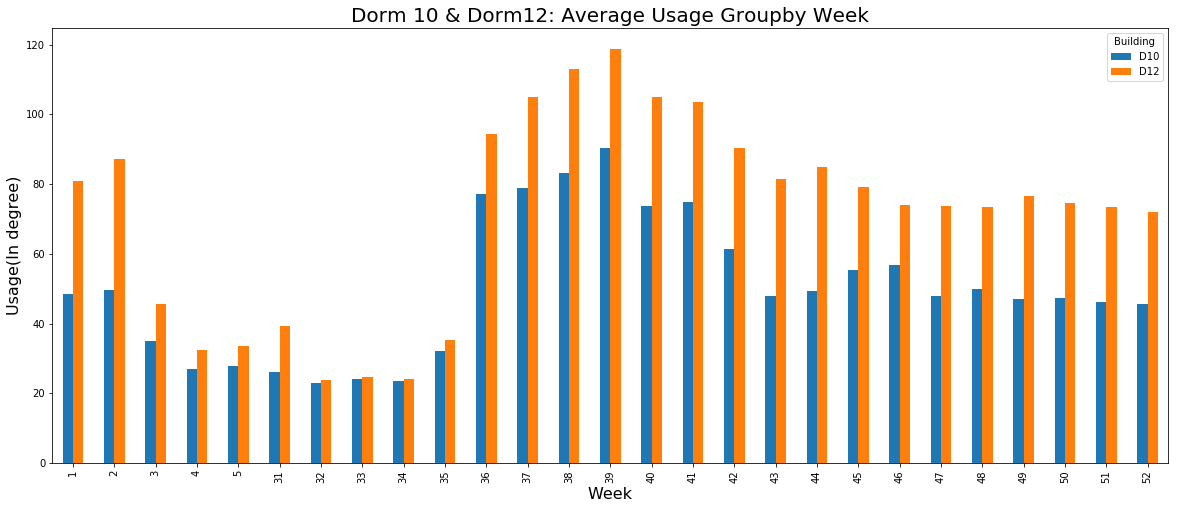

In [69]:
#(df.Weekday * 30).plot(legend = True)
df.groupby(['Week', 'Building']).Usage.mean().unstack().plot.bar(legend = True)
plt.title('Dorm 10 & Dorm12: Average Usage Groupby Week', fontsize = 20)
pylab.ylabel('Usage(In degree)',fontsize = 16)
pylab.xlabel('Week',fontsize = 16)

## 圖二: 十舍及十二舍每個Weekday的平均用電量
### 觀察到的現象
- 十二舍有電梯的使用，因此同一時間用電較十舍的高
- 圖中可見，十舍用電變化差異較小，而十二舍用電變化差異較大，可見電梯的使用對宿舍用電有明顯的影響

([<matplotlib.axis.XTick at 0x2346718d550>,
 <a list of 7 Text xticklabel objects>)

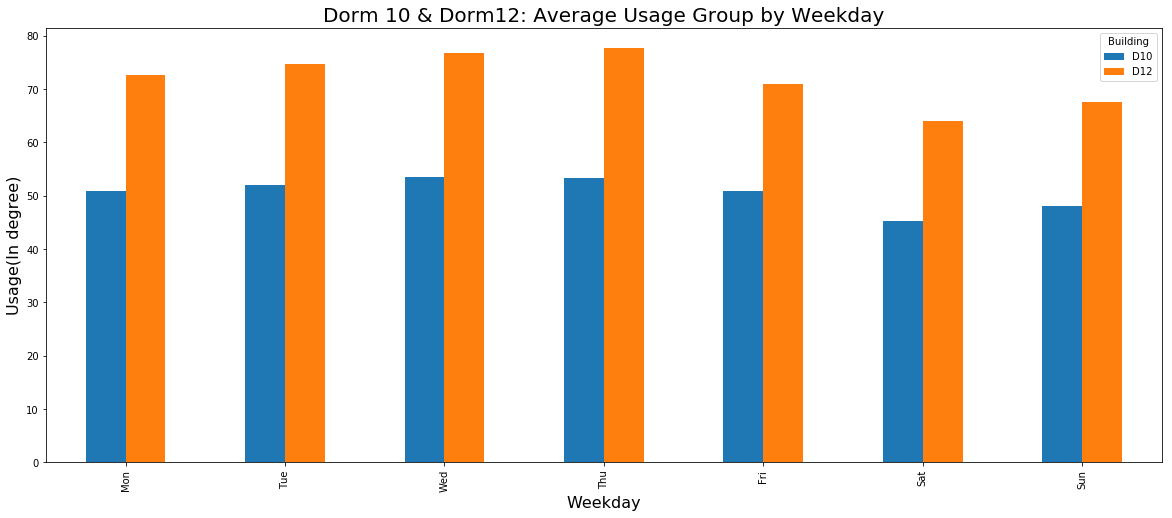

In [8]:
x_index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

df.groupby(['Weekday', 'Building']).Usage.mean().unstack().plot.bar(legend = True)

plt.title('Dorm 10 & Dorm12: Average Usage Group by Weekday', fontsize = 20)
pylab.ylabel('Usage(In degree)',fontsize = 16)
pylab.xlabel('Weekday',fontsize = 16)
plt.xticks(np.arange(7), x_index)

## 圖三: 十舍及十二舍每小時平均用電
### 觀察到的現象
- 10:00 ~ 17:00大家都跑去上課，電梯用量較少
- 晚上時段，十舍及十二舍的用電就有較大的差距，甚至3:00 ~ 6:00都還是有明顯的差距
- 因十二舍隨著晚上越來越多人使用電梯，因此用電量增幅也較十舍大

Text(0.5,0,'Time')

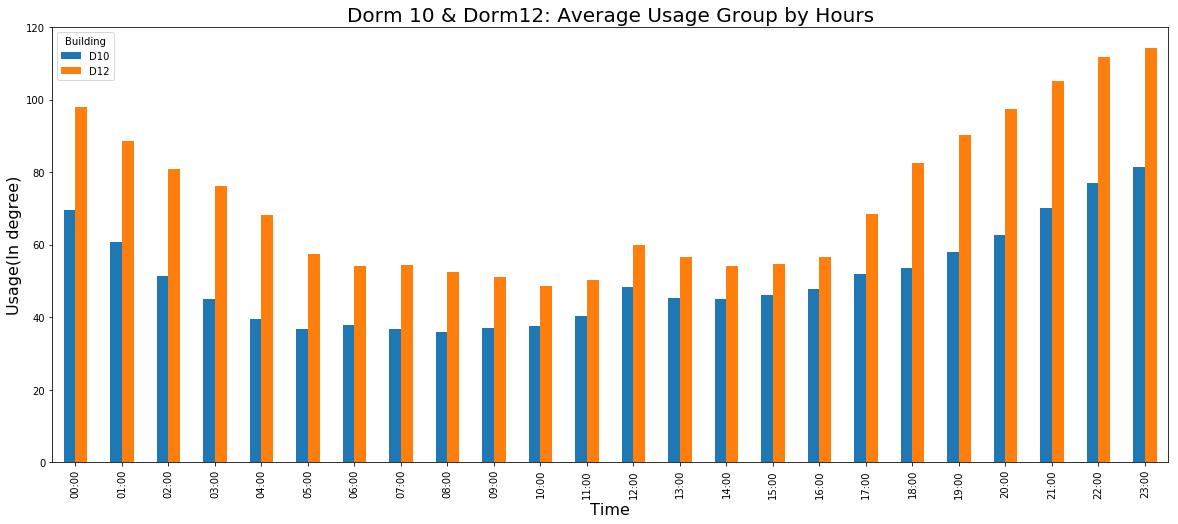

In [71]:
df.groupby(['Time', 'Building']).Usage.mean().unstack().plot.bar(legend = True)
plt.title('Dorm 10 & Dorm12: Average Usage Group by Hours', fontsize = 20)
pylab.ylabel('Usage(In degree)',fontsize = 16)
pylab.xlabel('Time',fontsize = 16)

## 圖三Plus: 十舍及十二舍每小時平均用電(用電差距變化)
### 觀察到的現象
- 用電差距集中在晚上

Text(0.5,0,'Time')

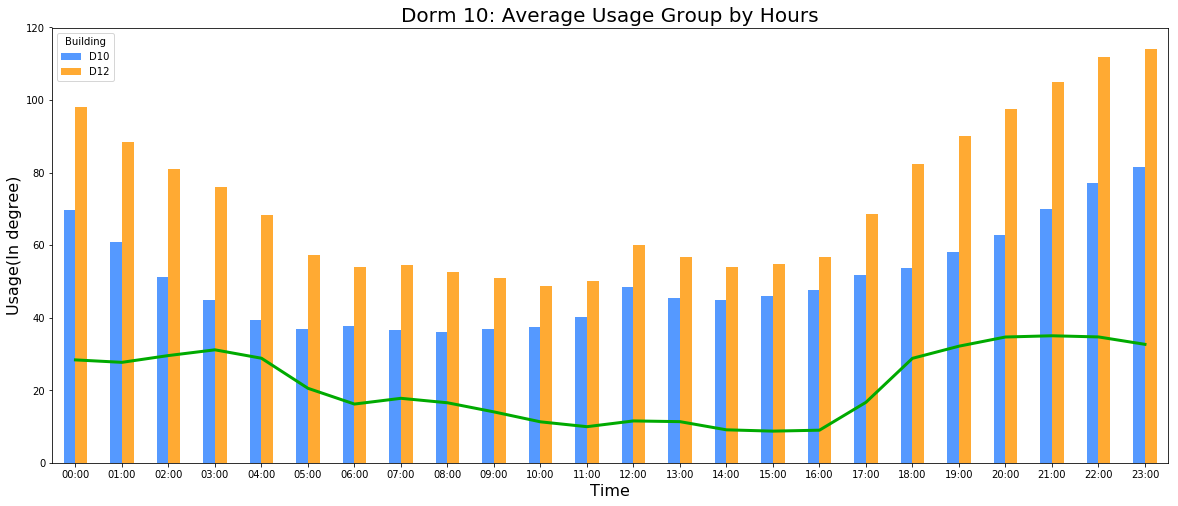

In [65]:
df.groupby(['Time', 'Building']).Usage.mean().unstack().plot.bar(legend = True, color = ['#5599FF', '#FFAA33'])
(df_d12.groupby('Time').Usage.mean() - df_d10.groupby('Time').Usage.mean()).plot(color = '#00AA00', lw = 3)
plt.title('Dorm 10: Average Usage Group by Hours', fontsize = 20)
pylab.ylabel('Usage(In degree)',fontsize = 16)
pylab.xlabel('Time',fontsize = 16)